# Data Visualisation and Graphs

[Dataset](https://www.kaggle.com/shivam2503/diamonds)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the dimensions common for all plots
sns.set(rc={"figure.figsize":(12, 7)})
sns.set_style('whitegrid')

In [3]:
# Reading the CSV file after uploading it on Colab
diamonds=pd.read_csv("diamonds.csv", index_col=[0])

In [4]:
# Checking the head to get an overview of the dataset
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data Preprocessing and Analysis

In [5]:
# First is finding a general overview of the dataset. Always better to make a copy and work on that variable
diamonds_copy = diamonds
diamonds_copy.info()

# Here we can see that there is no null data. Int64 and float64 are the values that are used which might take up huge space

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [7]:
# This is how you convert a higher bit recognized column to a lower bit
to32 = ['depth',	'table',	'price',	'x',	'y',	'z']
for i in to32:
  diamonds_copy[i] = diamonds_copy[i].astype(np.float32) 

**Challenge:** Convert all the columns to its 32 bit format that are needed.
done
[Docs Reference](https://colab.research.google.com/drive/1avxA2gUgJ0Oxddv3zT7ITKGfjEjiKTdi?authuser=1#scrollTo=ay0A7Z1HMSSh&line=1&uniqifier=1)

In [8]:
# Since all the columns are now set by you, lets move on to find a rough overview of all the values
diamonds_copy.describe()

# We can see the minum and maximum value of all the columns. This is particularly necessary
# for a thing which we call standardization. When applying models, this will be touched upon

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749390,57.457207,3932.810791,5.731124,5.734515,3.538747
std,0.474011,1.432627,2.234396,3989.439941,1.121741,1.142125,0.705700
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.799999,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900002,31.799999


**Challenge:** Find the mean, median and mode of all the columns using statistical formulaes.

[Formulaes](https://www.cuemath.com/data/mean-median-mode/)

In [9]:
# If I want to find the number of values in each type of cut, I will use value_counts() function
diamonds_copy['clarity'].value_counts()

# Here we can see that most diamonds have the ideal cut. Very few are fair rated 

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

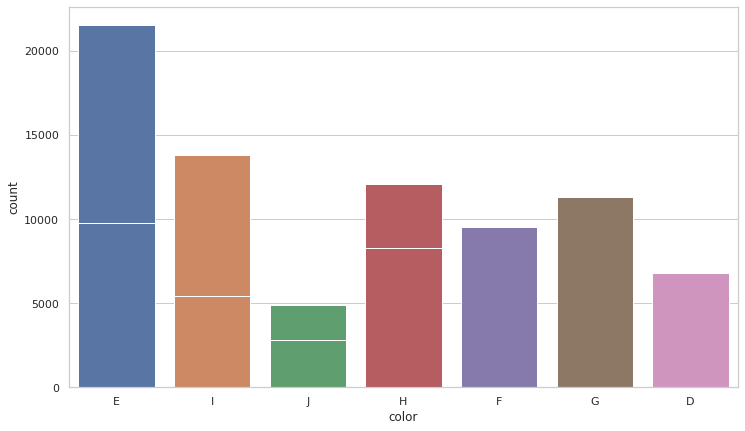

In [11]:
# Graphs are much better at understanding these stuff so a quick countplot
sns.countplot(data=diamonds_copy, x="cut")
# Reason why i chose this plot is because of the difference in values between each category

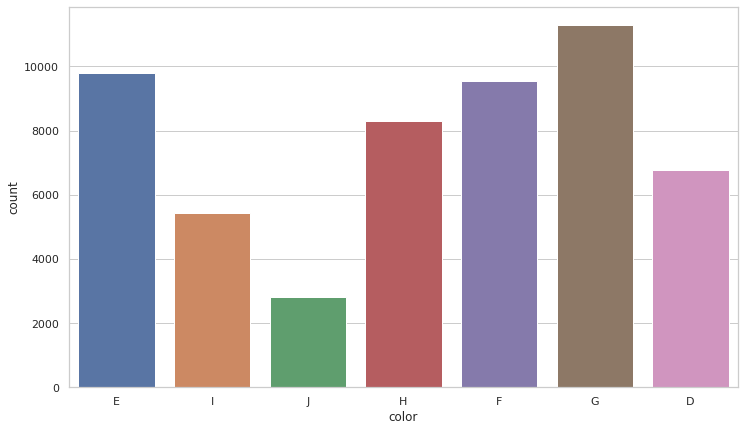

In [12]:
sns.countplot(data=diamonds_copy, x="color")

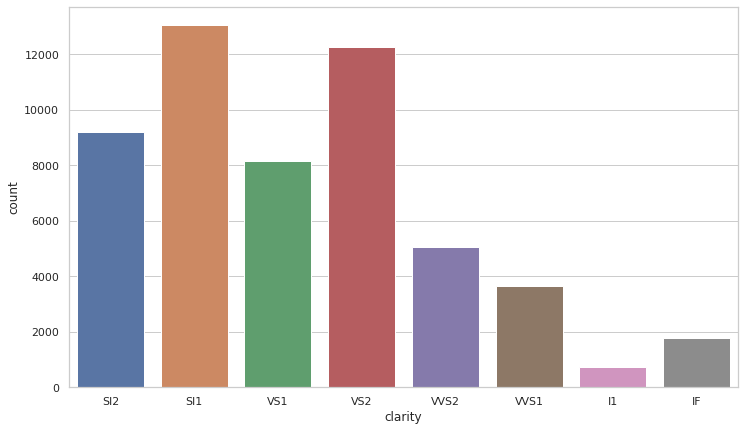

In [13]:
sns.countplot(data=diamonds_copy, x="clarity")

**Challenge:** Find the counts of colour and clairty respectively done

In [14]:
# Now if i want to find the clarity wise mean price of all. We will use the group_by() function
clarity_mean_price = diamonds_copy.groupby('clarity')['price'].mean().sort_values(ascending=False)
clarity_mean_price
# Here we can see that SI2 is the costliest diamond while the cheapest one is VVS1

clarity
SI2     5063.028809
SI1     3996.001221
VS2     3924.989502
I1      3924.168701
VS1     3839.455322
VVS2    3283.737061
IF      2864.839111
VVS1    2523.114746
Name: price, dtype: float32

In [17]:
clarity_mean_price.head()

clarity
SI2    5063.028809
SI1    3996.001221
VS2    3924.989502
I1     3924.168701
VS1    3839.455322
Name: price, dtype: float32

In [23]:
clarity_mean_price['SI2']

5063.029

In [35]:
idx, vals = [], []
for i in clarity_mean_price.index:
  idx.append(i)
for i in clarity_mean_price:
  vals.append(i)

[Text(0, 5138.02880859375, '5063'),
 Text(1, 4071.001220703125, '3996'),
 Text(2, 3999.989501953125, '3924'),
 Text(3, 3999.168701171875, '3924'),
 Text(4, 3914.455322265625, '3839'),
 Text(5, 3358.737060546875, '3283'),
 Text(6, 2939.839111328125, '2864'),
 Text(7, 2598.11474609375, '2523')]

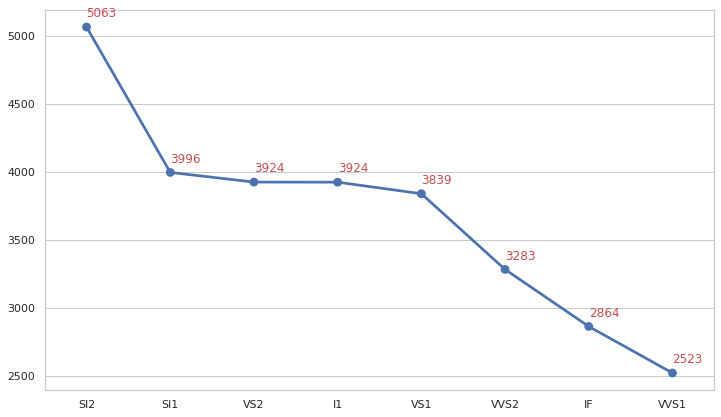

In [48]:
ax = sns.pointplot(x=idx,y=vals)
[ax.text(p[0], p[1]+75, int(p[1]), color='r') for p in zip(ax.get_xticks(), vals)]

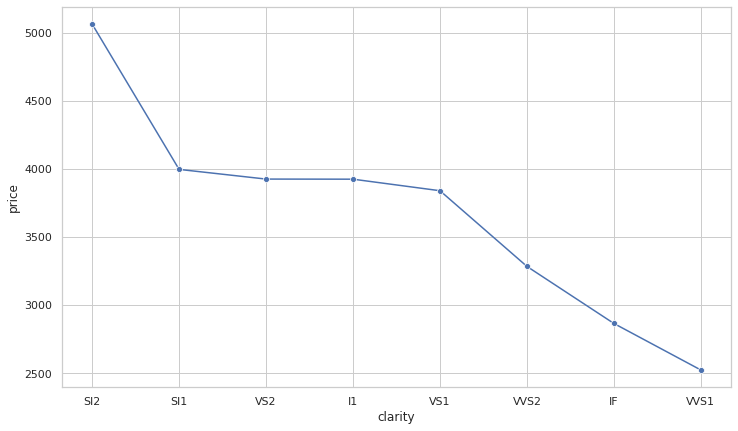

In [15]:
# Since these are all floating values, if i want to plot them, a line plot would be better and apt
sns.lineplot(data=clarity_mean_price,marker="o")

# With the help fo markers, we are able to analyse each point and its values

**Challenge:** Label each point in the graph given above with its mean value. Each point's value should be visible beside it DONE

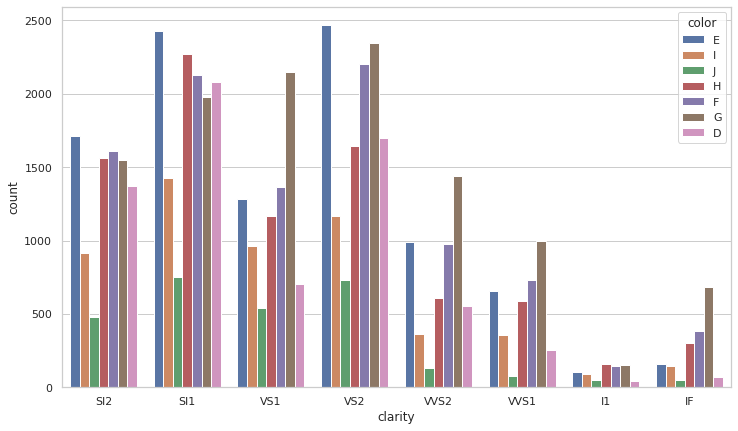

In [49]:
# If i want to find the number of diamonds based on clarity and color, we use the hue option
sns.countplot(data=diamonds_copy, x='clarity', hue='color')

# Here we can see that apart from the categories being split up by clarity, we can also see the color having a split up.

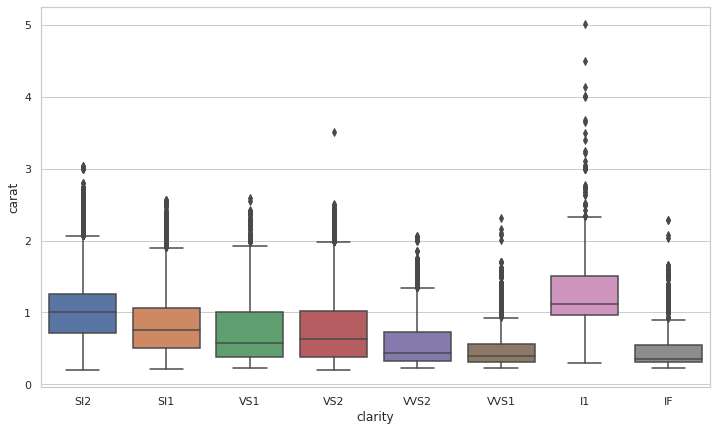

In [50]:
# If i want to use a box plot based on carat but segregated based on clarity, i will again use hue
sns.boxplot(data=diamonds_copy, x='clarity', y='carat')

# Here we can see the distribution of carat data among the various clairty. 

**Challenge:** Interpret the above graph and draw conclusions from it in terms of skewness and which has the most outliers etc.

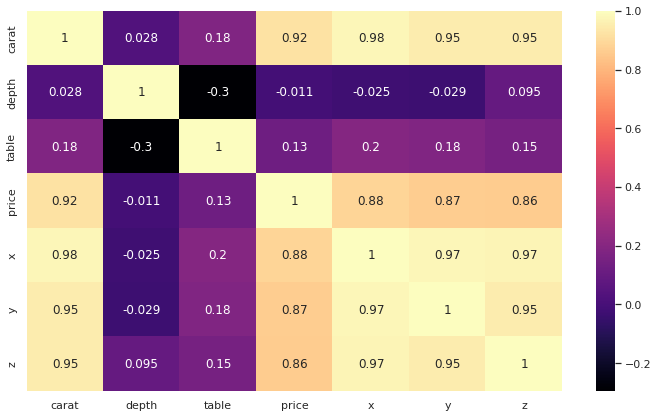

In [51]:
# The best way to analyse all columns and how they are related is by using a heatmap
sns.heatmap(diamonds_copy.corr(), cmap="magma", annot=True)

# Here we can see that carat is maximum related with x. That means, by knowing either value, the other value can be predicted

**Challenge:** Perform Analysis based on which columns are closely related and draw conclusions.

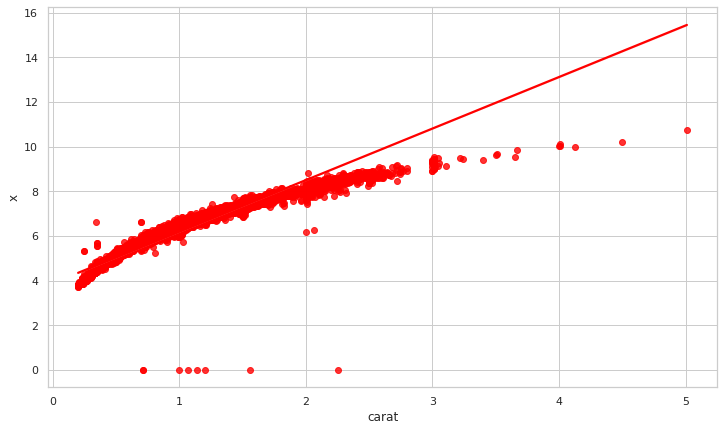

In [52]:
# After drawing the regression plot, we can see that we are getting a line of best fit
sns.regplot(data=diamonds_copy,x='carat', y='x', color="red")

In [53]:
# Now let us do some preprocessing to get neweer and easier plots
diamonds_copy.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.799999,61.0,326.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.900002,65.0,327.0,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.400002,58.0,334.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.299999,58.0,335.0,4.34,4.35,2.75


In [54]:
# Lets find the average price of carat 0.23 and distrubute it based on colour
color_wise_23carat_price=diamonds_copy[diamonds_copy['carat']==0.23].groupby('color')['price'].mean().sort_values(ascending=False)

# Here we can see the average price of a 0.23 carat diamond whose average prices are listed in descending order

In [55]:
# Converting it into a dataframe so that we can use it to plot data
temp=color_wise_23carat_price.to_frame().reset_index()

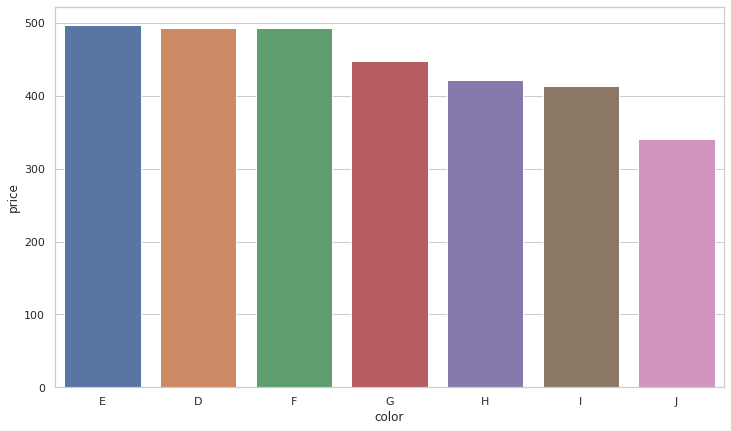

In [56]:
sns.barplot(data=temp, x='color', y='price')
# Since first three prices are close, this is not the best graph so look for the challenge below

**Challenge:** Suggest an alternative to the above plot that can be more informative than the current one

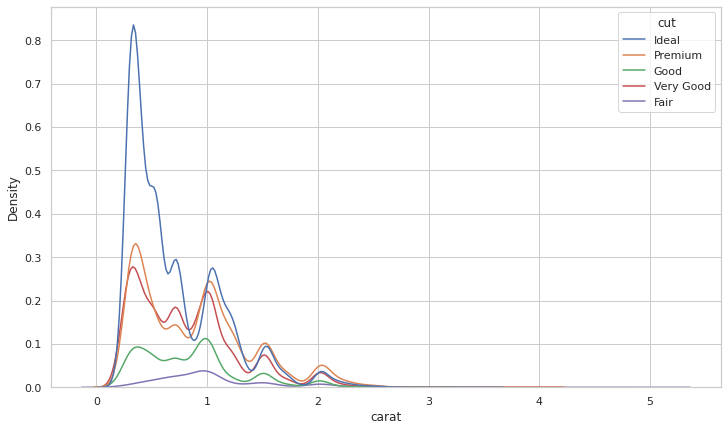

In [57]:
# This is what we call the kernel density plot. It helps analyse the concentration/distrubution across the data
sns.kdeplot(data=diamonds_copy, x='carat', hue='cut')

**Challenge:** Find the KDE plot similar to the above one with values x,y,z and hue as colour/clarity

In [58]:
# If i want to find the percentage of each type of diamond in the clarity 
count_clarity = diamonds_copy['clarity'].value_counts()

In [59]:
# Finding the sum of all counts.
count=0
for i in count_clarity:
  count+=i
# We can also use the sum() function. Try it out

In [60]:
# Here we use something which is called as the lambda function
percentage_clarity = count_clarity.apply(lambda x: x*100/count)
percentage_clarity


SI1     24.221357
VS2     22.725250
SI2     17.044865
VS1     15.148313
VVS2     9.391917
VVS1     6.776047
IF       3.318502
I1       1.373749
Name: clarity, dtype: float64

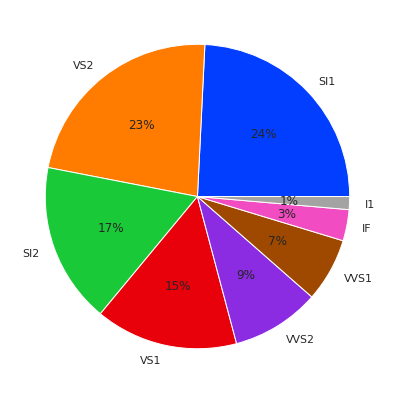

In [61]:
# Here is a pie chart to show the percentage of all the values in the series above. This helps us analyse properly
colors = sns.color_palette('bright')[0:8]
plt.pie(percentage_clarity.values, labels = percentage_clarity.index, colors = colors, autopct='%.0f%%')
plt.show()

**Challenge:** Find the pie chart for color and cut as well so that we are able to analyse which diamond is common and which is rare

In [62]:
# If i want to get the max and min value of each group based on colour we also use the group_by() function
x_wise = diamonds_copy.groupby('color')['x'].max()
y_wise = diamonds_copy.groupby('color')['y'].min()

In [63]:
# Here we join the two series
xy_min_max = pd.concat([x_wise,y_wise], axis=1, ignore_index=False)

In [64]:
# Renaming the columns
xy_min_max=xy_min_max.rename(columns={"x":"Max_x", "y":"Min_y"}).reset_index()

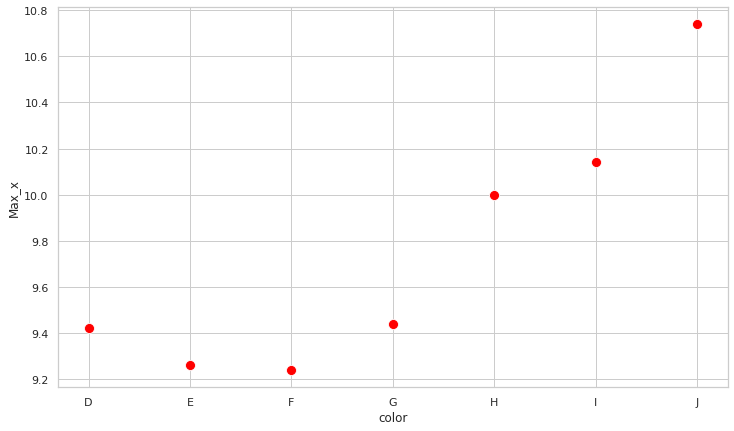

In [65]:
# Now plotting the scatter plot we will have an easier way to see the maxium and minum value of x based on colour
sns.scatterplot(data=xy_min_max, x='color',y='Max_x', color="red", s=100)

**Challenge:** Try to do the same thing for depth and price based on clarity so we can find the max and min value accordingly

In [66]:
# If we want, we can do multiple grouping as well. This way we can have proper segration of categories and subcategories accordinglys
multigroup_diamonds = diamonds_copy.groupby(['cut','clarity'])['depth'].mean()

In [67]:
# Resetting the index
multigroup_diamonds = multigroup_diamonds.to_frame().reset_index()

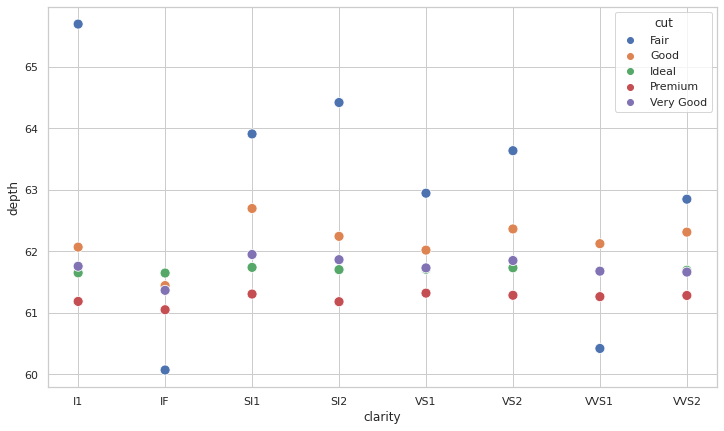

In [68]:
# Here we can see the mean depth of all groups based on clarity and cut together. This will help us analyse multiple categories at once
sns.scatterplot(data=multigroup_diamonds, x='clarity', y='depth', hue='cut', s=100)

**Challenge:** Perform PCA analysis on the diamonds dataset.

[Explanation](https://www.geeksforgeeks.org/reduce-data-dimentionality-using-pca-python/)

[ReferenceLink](https://www.youtube.com/watch?v=8klqIM9UvAc)